In [ ]:
# https://drive.google.com/file/d/1kJMKErxsV_buKYWgkLEP7njqdfUFTqcv/view?usp=sharing

In [ ]:
#UKURAN IMAGE 224 x 224

In [ ]:
!pip install tflite-support


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/Classification_dataset_small_10kelas.zip /content/

In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/Classification_dataset_small_10kelas.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
import os
import random
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

In [ ]:

train_dir = "/content/dataset/ML_ObjectDetectionModelExtraSmall/data/train"
valid_dir = "/content/dataset/ML_ObjectDetectionModelExtraSmall/data/validation"
dump_dir = '/content/dataset/ML_ObjectDetectionModelExtraSmall/data/validation/annotations'
class_names = os.listdir(train_dir)
print(class_names)
import shutil
dump_dir = '/content/dataset/ML_ObjectDetectionModelExtraSmall/data/validation/annotations'
shutil.rmtree(dump_dir)

['tomat', 'caberawit', 'wortel', 'tempe', 'bawangputih', 'dagingayam', 'telurayam', 'dagingsapi', 'kentang', 'bawang merah']


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.05
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Generator untuk training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=class_names
)

# Generator untuk validasi data
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=class_names  ,
)


Found 871 images belonging to 10 classes.
Found 75 images belonging to 10 classes.


In [ ]:
test_dir = '/content/dataset/ML_ObjectDetectionModelExtraSmall/data/test'
os.makedirs(test_dir, exist_ok=True)
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(test_class_dir, exist_ok=True)
    files = os.listdir(class_path)
    test_files = random.sample(files, int(0.05 * len(files)))  # Ambil 5%


    for file in test_files:
        shutil.move(os.path.join(class_path, file), os.path.join(test_class_dir, file))


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=class_names
)


Found 44 images belonging to 10 classes.


In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.4186 - loss: 1.8858 - val_accuracy: 0.8906 - val_loss: 0.4236
Epoch 2/5
 1/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7188 - loss: 0.8774

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7188 - loss: 0.8774 - val_accuracy: 0.9091 - val_loss: 0.3289
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 729ms/step - accuracy: 0.8977 - loss: 0.3556 - val_accuracy: 0.9219 - val_loss: 0.2927
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8750 - loss: 0.2850 - val_accuracy: 0.9091 - val_loss: 0.1764
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 572ms/step - accuracy: 0.9352 - loss: 0.2247 - val_accuracy: 0.9219 - val_loss: 0.2300


In [ ]:
print(f"Training Acc: {history.history['accuracy'][-1]}")
print(f"Validation Acc: {history.history['val_accuracy'][-1]}")

Training Acc: 0.9368295669555664
Validation Acc: 0.921875


In [ ]:
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Acc: {test_acc}")
print(f"Test Loss: {test_loss}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.9062 - loss: 0.2308
Test Acc: 0.90625
Test Loss: 0.2307787537574768


In [ ]:
# Simpan model
model.save('model_food_class.h5')

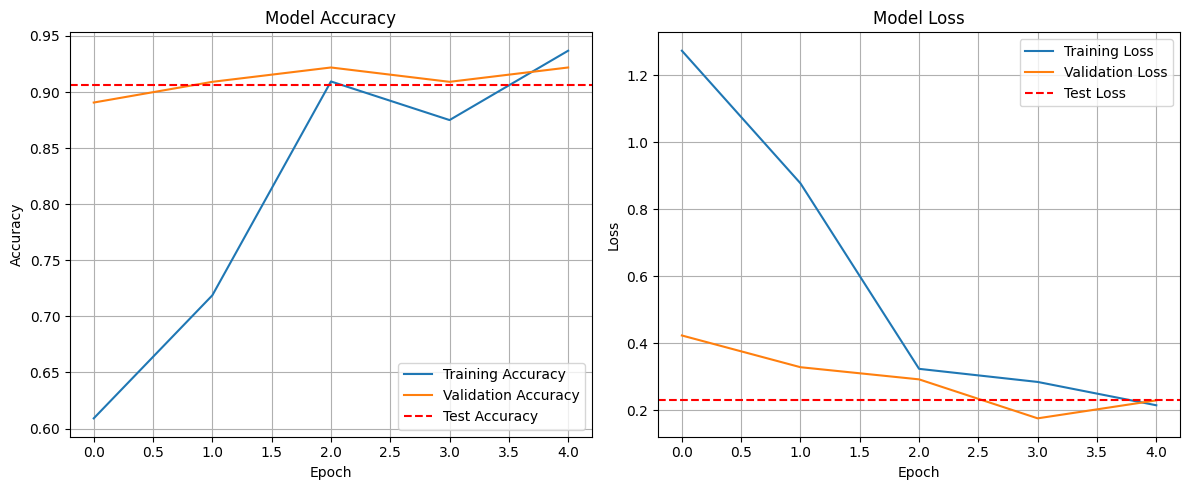

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:

# Pilih apakah ingin menggunakan quantization atau tidak
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]  # Opsional

# Ubah model menjadi TensorFlow Lite
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file
with open('model_classification.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpp6plavog'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  133767124343920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133767124388320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133767124390432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133767124350784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133767124386032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133767124393952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133767124394304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133767124395712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133767124392016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133767124393600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133767124398

In [ ]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

# Path ke model dan file output
MODEL_PATH = "/content/model_classification.tflite"
OUTPUT_MODEL_PATH = "/content/model_classification_metadata.tflite"


INPUT_MEAN = 0.0
INPUT_STD = 1.0

# Tambahkan metadata
writer = image_classifier.MetadataWriter.create_for_inference(
    writer_utils.load_file(MODEL_PATH),
    input_norm_mean=INPUT_MEAN,
    input_norm_std=INPUT_STD,
    label_file_paths=["labels.txt"]
)

# Simpan model dengan metadata
with open(OUTPUT_MODEL_PATH, "wb") as f:
    f.write(writer.populate())


In [ ]:
import tensorflow as tf

# Load the TFLite model
model_path = '/content/model_classification_metadata.tflite'

interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Extract metadata
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Details:", input_details)
print("Output Details:", output_details)


Input Details: [{'name': 'serving_default_input_layer_1:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output Details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 180, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
model_json = model.to_json()
with open('model_food_classification2.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights('model_food_classification_weights2.weights.h5')


In [ ]:

model = tf.keras.models.load_model('model_food_classification2.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]


tflite_model = converter.convert()


with open('model_food_classification_quantized2.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2

def predict_single_image(model, img_path, target_size=(224, 224)):


    # Baca dan resize gambar
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, target_size)

    # Preprocessing: Normalisasi dan ubah ke array
    img_array = image.img_to_array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi dengan model
    predictions = model.predict(img_array)

    # Ambil kelas dengan confidence tertinggi
    predicted_class = np.argmax(predictions)
    confidence = predictions[0][predicted_class]

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


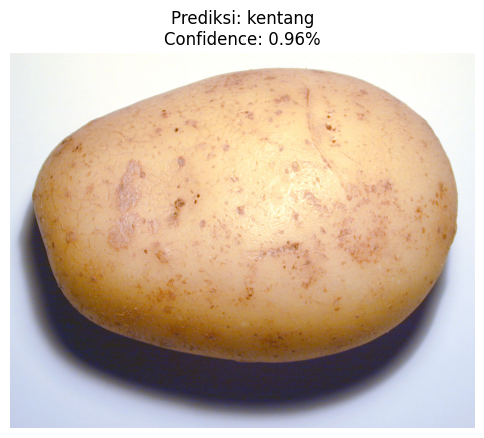

In [ ]:
import matplotlib.image as mpimg
class_names = os.listdir(train_dir)
#['caberawit', 'tomat', 'wortel', 'tempe', 'bawangputih', 'dagingsapi', 'kentang', 'dagingayam', 'bawang merah', 'telurayam']
# Path ke gambar
img_path = "/content/dataset/ML_ObjectDetectionModelExtraSmall/data/test/kentang/Image_60.jpg"
# Prediksi
predicted_class, confidence = predict_single_image(model, img_path, target_size=(224, 224))

img = mpimg.imread(img_path)  # Membaca gambar

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediksi: {class_names[predicted_class]}\nConfidence: {confidence:.2f}%", fontsize=12)
plt.show()
